In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import geopandas as gpd
import seaborn as sns

#Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)

In [22]:
df = pd.read_parquet('Datasets/FemaDataWithWaterDepthStatistics.parquet.gzip')

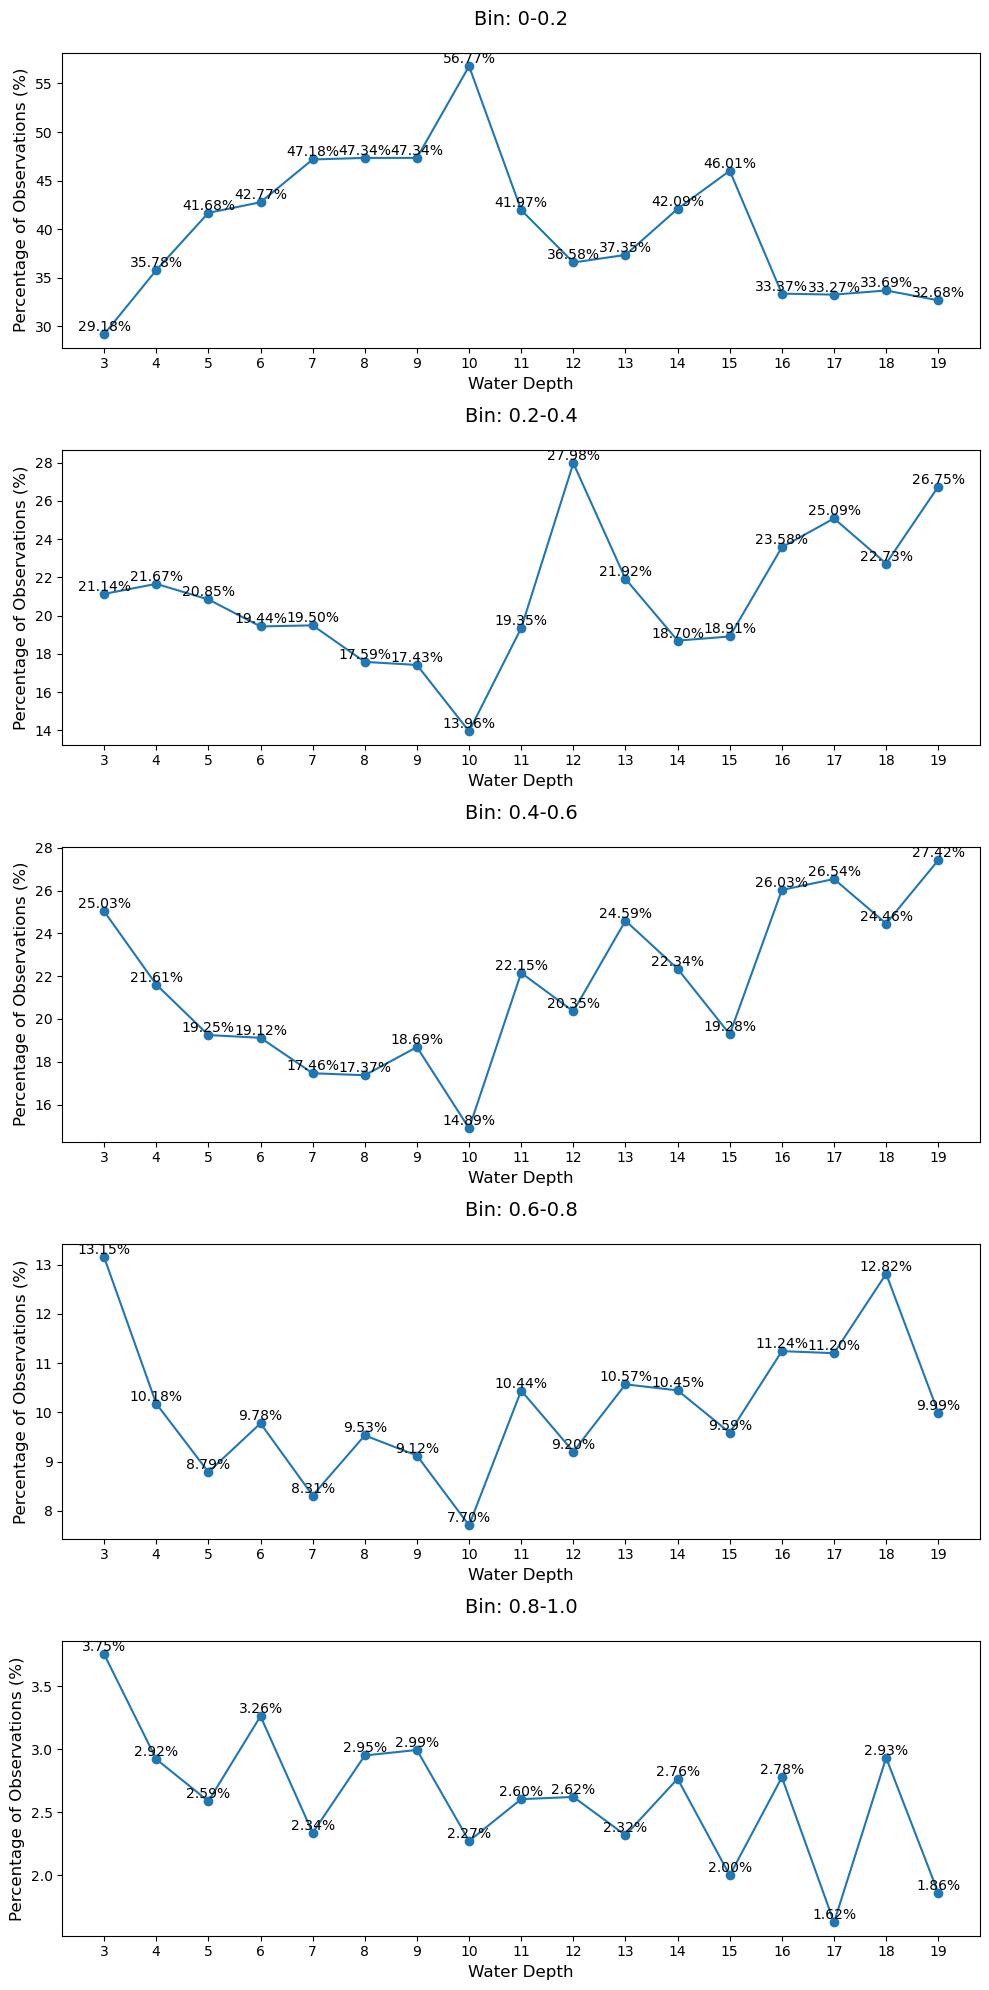

In [10]:
import matplotlib.pyplot as plt
import numpy as np

bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
waterDepths = list(range(3, 20))

fig, axs = plt.subplots(5, 1, figsize=(10, 20))

for i, bin_label in enumerate(bin_labels):
    observations = []
    total_observations = []

    for depth in waterDepths:
        total_depth_df = df[df['waterDepth'] == depth]
        total_num_observations = len(total_depth_df)
        total_observations.append(total_num_observations)

        filtered_df = df[(df['waterDepth'] == depth) & (df['proportionLeqOne'] >= bin_edges[i]) & (df['proportionLeqOne'] < bin_edges[i+1])]
        num_observations = len(filtered_df)
        percentage_observations = (num_observations / total_num_observations) * 100 if total_num_observations > 0 else 0
        observations.append(percentage_observations)

    axs[i].plot(waterDepths, observations, marker='o')
    
    axs[i].set_xticks(waterDepths)
    axs[i].set_xticklabels(waterDepths)
    
    for j, obs in enumerate(observations):  # This loop adds the annotations
        axs[i].text(waterDepths[j], obs, f'{obs:.2f}%', ha='center', va='bottom')

    axs[i].set_ylabel('Percentage of Observations (%)', fontsize=12)
    axs[i].set_xlabel('Water Depth', fontsize=12)  # X-label for each subplot
    axs[i].set_title(f'Bin: {bin_label}', fontsize=14, pad=20)

plt.subplots_adjust(top=0.92)  # This adjusts the padding for the title
plt.tight_layout()
plt.show()


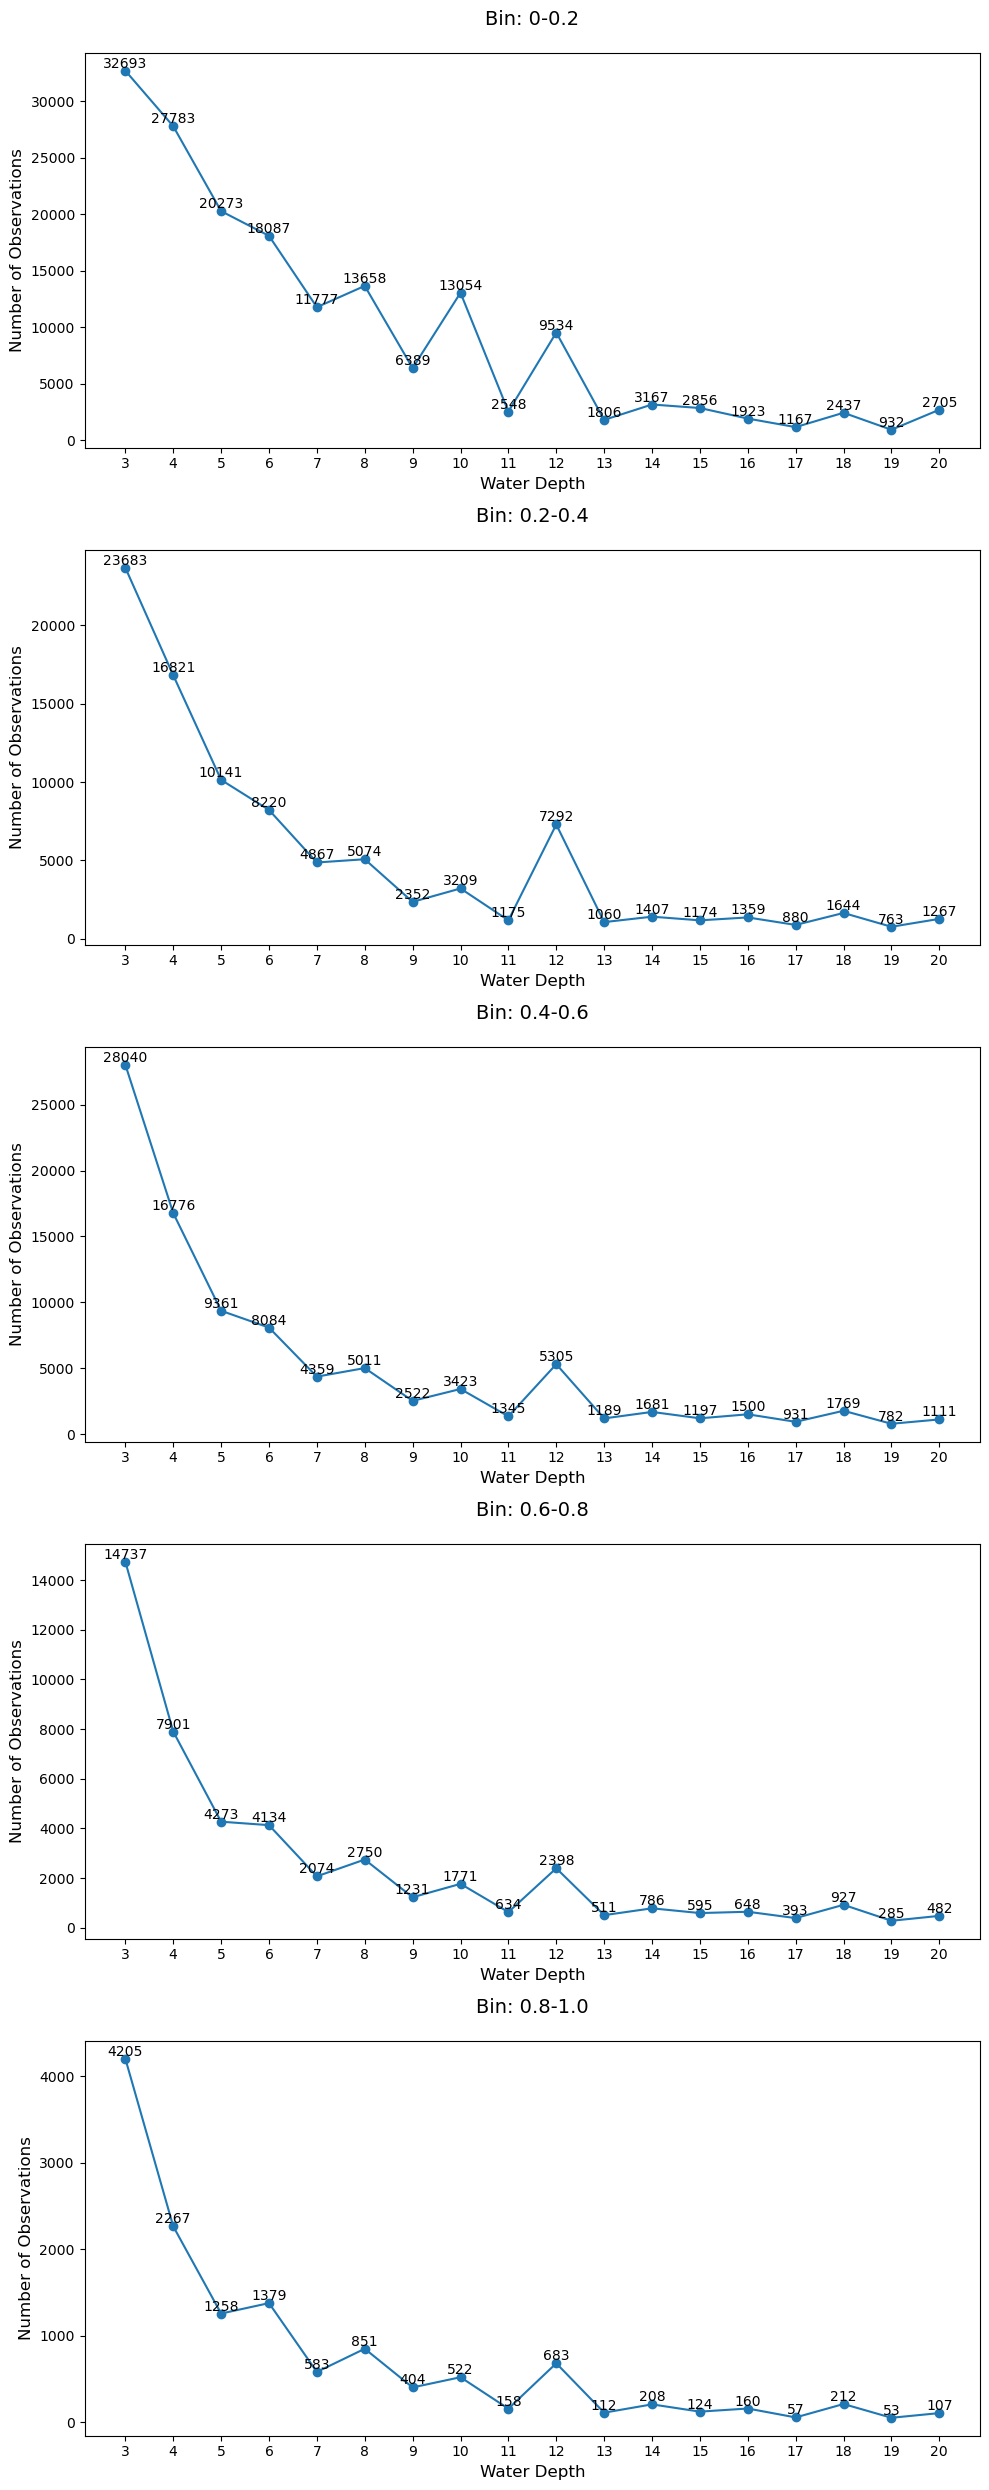

In [11]:
import matplotlib.pyplot as plt
import numpy as np

bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
waterDepths = list(range(3, 21))

fig, axs = plt.subplots(5, 1, figsize=(10, 25))

for i, bin_label in enumerate(bin_labels):
    observations = []

    for depth in waterDepths:
        filtered_df = df[(df['waterDepth'] == depth) & (df['proportionLeqOne'] >= bin_edges[i]) & (df['proportionLeqOne'] < bin_edges[i+1])]
        num_observations = len(filtered_df)
        observations.append(num_observations)

    axs[i].plot(waterDepths, observations, marker='o')
    
    for j, obs in enumerate(observations):  # This loop adds the annotations
        axs[i].text(waterDepths[j], obs, str(obs), ha='center', va='bottom')

        
    axs[i].set_xticks(waterDepths)
    axs[i].set_xticklabels(waterDepths)
    axs[i].set_ylabel('Number of Observations', fontsize=12)
    axs[i].set_xlabel('Water Depth', fontsize=12)  # X-label for each subplot
    axs[i].set_title(f'Bin: {bin_label}', fontsize=14, pad=20)

plt.subplots_adjust(top=0.92)  # This adjusts the padding for the title
plt.tight_layout()
plt.show()


In [35]:
df[(df['buildingPropertyValue'] >= 10000) & (df['buildingPropertyValue'] < 10000000)]

df['relativeDamage'] = df['buildingDamageAmount']/df['buildingPropertyValue']

df['relativeDamage'].replace([np.inf, -np.inf], np.nan, inplace=True)

df = df[df['relativeDamage'] <= 1]

In [46]:
df_temp = df[df['waterDepth']<9]

In [47]:
df_new = df[df['waterDepth']>=9]

df_new = df_new[df_new['floodEvent'].notna()]

df_combined = pd.concat([df_temp, df_new])

In [51]:
df_combined_temp = df_combined[(df_combined['waterDepth'] > -1) & (df_combined['waterDepth'] < 31)]

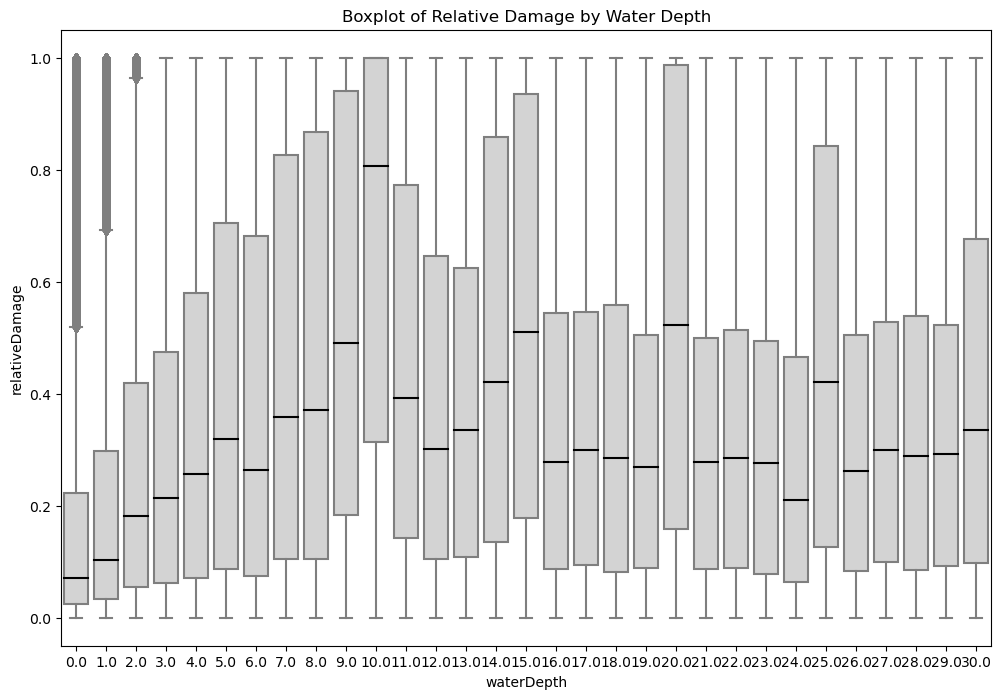

In [52]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="waterDepth", y="relativeDamage", data=df_combined_temp, color="lightgray", medianprops={"color": "black"})

plt.title('Boxplot of Relative Damage by Water Depth')
plt.show()